<center><h1>Nabar_Deven_HW8</h1></center>

Name: Deven Nabar
<br>
Github Username: DevenNabar
<br>
USC ID: 7229446568

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '2'

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.model_selection import StratifiedKFold
import random
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [3]:
import warnings
warnings.filterwarnings("ignore")

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [4]:
data=pd.read_csv('../data/wdbc.data', header=None)

In [5]:
data=data.drop(columns=[0])

In [6]:
data

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
data_M=data[data[1]=='M']

In [8]:
data_M

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [9]:
data_B=data[data[1]=='B']

In [10]:
data_B

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [11]:
X_M=data_M.iloc[:,1:]
X_B=data_B.iloc[:,1:]
Y_M=pd.DataFrame(data_M.iloc[:,0])
Y_B=pd.DataFrame(data_B.iloc[:,0])

In [12]:
X_M

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [13]:
Y_M

,1
0,M
1,M
2,M
3,M
4,M
...,...
563,M
564,M
565,M
566,M


### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

In [14]:
accuracy_train=[]
F1_score_train=[]
precision_train=[]
recall_train=[]
AUC_train=[]

In [15]:
accuracy_test=[]
F1_score_test=[]
precision_test=[]
recall_test=[]
AUC_test=[]

In [16]:
def TEST_TRAIN_SPLIT(X_M, Y_M, X_B, Y_B, TestSize):
    X_train=pd.DataFrame()
    X_test=pd.DataFrame()
    Y_train=pd.DataFrame()
    Y_test=pd.DataFrame()
    #test-train split for Malignant Observations (making sure 20% are in test)
    X_train_M, X_test_M, Y_train_M, Y_test_M = train_test_split(X_M, Y_M, test_size=TestSize)
    #test-train split for Benign Observations (making sure 20% are in test)
    X_train_B, X_test_B, Y_train_B, Y_test_B = train_test_split(X_B, Y_B, test_size=TestSize)
    #Combining X_train, X_test of Malignant and Benign
    X_train=pd.concat([X_train_M, X_train_B], ignore_index=True, sort=False)
    X_test=pd.concat([X_test_M, X_test_B], ignore_index=True, sort=False)
    #Combining Y_train, Y_test of Malignant and Benign
    Y_train=pd.concat([Y_train_M, Y_train_B], ignore_index=True, sort=False)
    Y_test=pd.concat([Y_test_M, Y_test_B], ignore_index=True, sort=False)
    return X_train, X_test, Y_train, Y_test     

In [17]:
for i in range(0,30):
    #self defined function to test_train_split
    X_train, X_test, Y_train, Y_test = TEST_TRAIN_SPLIT(X_M, Y_M, X_B, Y_B, 0.2)

    #Encoding Malignant to 1 and Benign to 0
    Y_train=LabelEncoder().fit_transform(Y_train.values.ravel())
    Y_test=LabelEncoder().fit_transform(Y_test.values.ravel())
    
    #Normalizing X_train and X_test
    X_train_norm=MinMaxScaler().fit_transform(X_train)
    X_test_norm=MinMaxScaler().fit_transform(X_test)
    
    #applying Linear SVM with L1 penalty
    param_grid_SVM={
    'C':np.logspace(-3,6,10),
    }
    gridSVM_L1 = GridSearchCV(estimator=LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=100000), param_grid=param_grid_SVM, cv=5)
    gridSVM_L1.fit(X_train_norm, Y_train)
    y_pred_train=gridSVM_L1.predict(X_train_norm)
    y_pred_test=gridSVM_L1.predict(X_test_norm)
    
    #calc train and test accuracy
    accuracy_train.append(accuracy_score(Y_train, y_pred_train))
    accuracy_test.append(accuracy_score(Y_test, y_pred_test))
    
    #calc train and test precision
    precision_train.append(precision_score(Y_train, y_pred_train))
    precision_test.append(precision_score(Y_test, y_pred_test))
    
    #calc train and test recall
    recall_train.append(recall_score(Y_train, y_pred_train))
    recall_test.append(recall_score(Y_test, y_pred_test))
    
    #calc train and test f1_score
    F1_score_train.append(f1_score(Y_train, y_pred_train))
    F1_score_test.append(f1_score(Y_test, y_pred_test))
    
    #calc AUC score for test and train
    fpr, tpr, thresholds = roc_curve(Y_train, y_pred_train, pos_label=1)
    AUC_train.append(auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_test, pos_label=1)
    AUC_test.append(auc(fpr, tpr))

In [18]:
print("Train",sum(accuracy_train)/30)
print("TEST",sum(accuracy_test)/30)

Train 0.9869309838472838
TEST 0.9089855072463771


In [19]:
train_sup_learn =sum(accuracy_train)/30
test_sup_learn = sum(accuracy_test)/30
print("train results:")
print("The accuracy is", train_sup_learn)
print("The F1 score is", sum(F1_score_train)/30)
print("The precision is", sum(precision_train)/30)
print("The recall is", sum(recall_train)/30)
print("The AUC is", sum(AUC_train)/30)
print("test results:")
print("The accuracy is", test_sup_learn)
print("The F1 score is", sum(F1_score_test)/30)
print("The precision is", sum(precision_test)/30)
print("The recall is", sum(recall_test)/30)
print("The AUC is", sum(AUC_test)/30)

train results:
The accuracy is 0.9869309838472838
The F1 score is 0.9822601926469382
The precision is 0.9909593183675729
The recall is 0.9737672583826426
The AUC is 0.9842520502439532
test results:
The accuracy is 0.9089855072463771
The F1 score is 0.8954428645570983
The precision is 0.8464465142229163
The recall is 0.9666666666666665
The AUC is 0.9206018518518516


In [20]:
print("Confusion matrix for train data\n", confusion_matrix(Y_train, y_pred_train))
print("Confusion matrix for train data\n", confusion_matrix(Y_test, y_pred_test))

Confusion matrix for train data
 [[285   0]
 [  3 166]]
Confusion matrix for train data
 [[70  2]
 [ 1 42]]


The ROC Curve for train data:


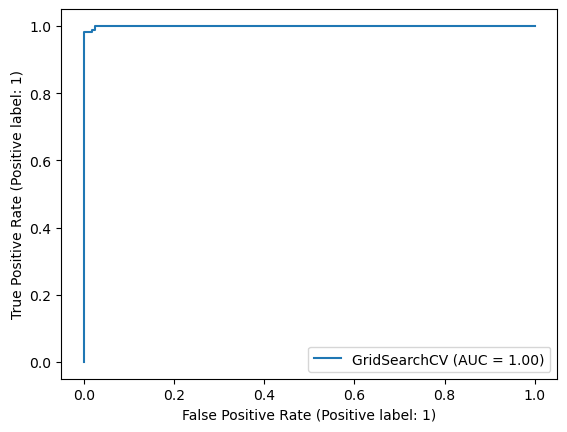

In [21]:
print("The ROC Curve for train data:")
RocCurveDisplay.from_estimator(gridSVM_L1, X_train_norm, Y_train)

The ROC Curve for test data:


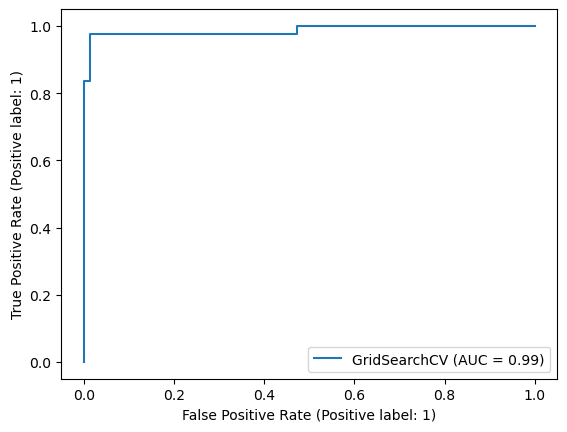

In [22]:
print("The ROC Curve for test data:")
RocCurveDisplay.from_estimator(gridSVM_L1, X_test_norm, Y_test)

#### (ii) Semi-Supervised Learning/ Self-training

In [23]:
accuracy_train=[]
F1_score_train=[]
precision_train=[]
recall_train=[]
AUC_train=[]

In [24]:
accuracy_test=[]
F1_score_test=[]
precision_test=[]
recall_test=[]
AUC_test=[]

In [25]:
for i in range(0,30):
    #using the self defined test_train_split function
    X_train, X_test, Y_train, Y_test = TEST_TRAIN_SPLIT(X_M, Y_M, X_B, Y_B, 0.2)
    
    #dividing the training set to labelled and unlabelled data using 50% of positive and negative class
    X_train_labelled, X_train_unlabelled, Y_train_labelled, Y_train_unlabelled = TEST_TRAIN_SPLIT(X_train[Y_train[1]=='M'], Y_train[Y_train[1]=='M'], X_train[Y_train[1]=='B'], Y_train[Y_train[1]=='B'], 0.5)
    
    #Encoding Malignant to 1 and Benign to 0
    Y_train_labelled=LabelEncoder().fit_transform(Y_train_labelled.values.ravel())
    Y_test=LabelEncoder().fit_transform(Y_test.values.ravel())
    
    #Normalizing X_train and X_test
    X_train_norm_labelled=MinMaxScaler().fit_transform(X_train_labelled)
    X_train_norm_unlabelled=MinMaxScaler().fit_transform(X_train_unlabelled)
    X_test_norm=MinMaxScaler().fit_transform(X_test)
    
    #applying Linear SVM with L1 penalty
    param_grid_SVM={
    'C':[0.01,0.1,1,10],
    }
    gridSVM_L1 = GridSearchCV(estimator=LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=100000), param_grid=param_grid_SVM, cv=5)
    gridSVM_L1.fit(X_train_norm_labelled, Y_train_labelled)
    
    #till the x_train_unlabelled is empty
        #calc the distance and farthest pt in unlabelled
        #label it using SVM
        #add it to labelled X and Y
        #train SVM with the updated labelled X and Y
        #remove it from the unlabelled X
    
    while len(X_train_norm_unlabelled)!=0:
        distance_X=gridSVM_L1.decision_function(X_train_norm_unlabelled)
        y_label=gridSVM_L1.predict(X_train_norm_unlabelled[np.where(distance_X==max(distance_X))])
        X_train_norm_labelled=np.vstack((X_train_norm_labelled, X_train_norm_unlabelled[np.where(distance_X==max(distance_X))]))
        Y_train_labelled=np.append(Y_train_labelled, y_label)
        gridSVM_L1.fit(X_train_norm_labelled, Y_train_labelled)
        X_train_norm_unlabelled=np.delete(X_train_norm_unlabelled, np.where(distance_X==max(distance_X)), axis=0)
    y_pred_train=gridSVM_L1.predict(X_train_norm_labelled)
    y_pred_test=gridSVM_L1.predict(X_test_norm)
    
    #calc train and test accuracy
    accuracy_train.append(accuracy_score(Y_train_labelled, y_pred_train))
    accuracy_test.append(accuracy_score(Y_test, y_pred_test))
    
    #calc train and test precision
    precision_train.append(precision_score(Y_train_labelled, y_pred_train))
    precision_test.append(precision_score(Y_test, y_pred_test))
    
    #calc train and test recall
    recall_train.append(recall_score(Y_train_labelled, y_pred_train))
    recall_test.append(recall_score(Y_test, y_pred_test))
    
    #calc train and test f1_score
    F1_score_train.append(f1_score(Y_train_labelled, y_pred_train))
    F1_score_test.append(f1_score(Y_test, y_pred_test))
    
    #calc AUC score for test and train
    fpr, tpr, thresholds = roc_curve(Y_train_labelled, y_pred_train, pos_label=1)
    AUC_train.append(auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_test, pos_label=1)
    AUC_test.append(auc(fpr, tpr))
    print("iteration:", i)      
     

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29


In [26]:
print("Train accuracy is", sum(accuracy_train)/30)
print("Test accuracy is",sum(accuracy_test)/30)

Train accuracy is 0.9822320117474302
Test accuracy is 0.62


In [27]:
train_semi_sup = sum(accuracy_train)/30
test_semi_sup = sum(accuracy_test)/30
print("train results:")
print("The accuracy is", train_semi_sup)
print("The F1 score is", sum(F1_score_train)/30)
print("The precision is", sum(precision_train)/30)
print("The recall is", sum(recall_train)/30)
print("The AUC is", sum(AUC_train)/30)
print("test results:")
print("The accuracy is", test_semi_sup)
print("The F1 score is", sum(F1_score_test)/30)
print("The precision is", sum(precision_test)/30)
print("The recall is", sum(recall_test)/30)
print("The AUC is", sum(AUC_test)/30)

train results:
The accuracy is 0.9822320117474302
The F1 score is 0.9855017687858543
The precision is 0.9878296135485692
The recall is 0.9832656108876235
The AUC is 0.9807225701945028
test results:
The accuracy is 0.62
The F1 score is 0.679399947793153
The precision is 0.5451466009165583
The recall is 0.9744186046511627
The AUC is 0.691375968992248


In [28]:
print("Confusion matrix for train data\n", confusion_matrix(Y_train_labelled, y_pred_train))
print("Confusion matrix for train data\n", confusion_matrix(Y_test, y_pred_test))

Confusion matrix for train data
 [[267   5]
 [ 15 167]]
Confusion matrix for train data
 [[68  4]
 [ 1 42]]


The ROC Curve for test data:


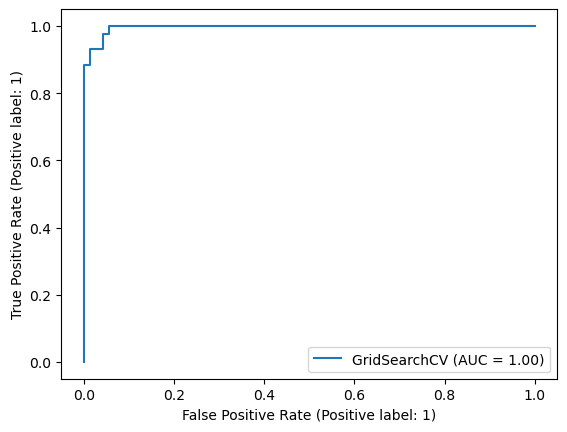

In [29]:
print("The ROC Curve for test data:")
RocCurveDisplay.from_estimator(gridSVM_L1, X_test_norm, Y_test)

#### (iii) Unsupervised Learning

In [30]:
y=LabelEncoder().fit_transform(data.iloc[:, 0])

In [31]:
train_accuracy=0
test_accuracy=0
train_f1_score=0
test_f1_score=0
train_precision_score=0
test_precision_score=0
train_recall_score=0
test_recall_score=0
train_roc_auc_score=0
test_roc_auc_score=0

In [32]:
len(y)

569

In [33]:
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], y, test_size=0.2, shuffle=True, stratify=y)

    X_train_norm=MinMaxScaler().fit_transform(X_train)
    X_test_norm=MinMaxScaler().fit_transform(X_test)

    y_train=pd.DataFrame(y_train)

    kmeans=KMeans(n_clusters=2, random_state=random.randint(0,100)).fit(X_train_norm)

    neighbours = NearestNeighbors(n_neighbors=30).fit(X_train_norm)
    distances, indices = neighbours.kneighbors(kmeans.cluster_centers_)

    polling_0=list(dict(y_train.loc[indices[0]].value_counts()).keys())[0][0]
    polling_1=list(dict(y_train.loc[indices[1]].value_counts()).keys())[0][0]

    pred = pd.DataFrame(kmeans.labels_)
    pred_0=pred[pred[0]==0]
    pred_1=pred[pred[0]==1]
    pred_0['y']=polling_0
    pred_1['y']=polling_1
    train_pred=pd.concat([pred_0['y'],pred_1['y']],axis=0)

    train_pred = train_pred.sort_index()
    test_pred = kmeans.predict(X_test_norm)
    train_accuracy=train_accuracy+accuracy_score(train_pred, y_train)
    test_accuracy=test_accuracy+accuracy_score(test_pred, y_test)
    train_precision_score=train_precision_score+precision_score(y_train, train_pred, average=None)
    test_precision_score=test_precision_score+precision_score(y_test, test_pred, average=None)
    train_recall_score=train_recall_score+recall_score(y_train, train_pred, average=None)
    test_recall_score=test_recall_score+recall_score(y_test, test_pred, average=None)
    train_f1_score=train_f1_score+f1_score(y_train, train_pred, average=None)
    test_f1_score=test_f1_score+f1_score(y_test, test_pred, average=None)
    fpr, tpr, _ = roc_curve(y_train, train_pred)
    train_roc_auc_score=train_roc_auc_score+auc(fpr, tpr)
    fpr, tpr, _ = roc_curve(y_test, test_pred)
    test_roc_auc_score=test_roc_auc_score+auc(fpr, tpr)
    print("iteration: ", i)

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29


In [34]:
print('Average Training Accuracy: ',train_accuracy/(i+1))
print('Average Test Acuracy: ',test_accuracy/(i+1))

Average Training Accuracy:  0.9260073260073262
Average Test Acuracy:  0.4988304093567251


In [35]:
train_unsup_learn = train_accuracy/(i+1)
test_unsup_learn = test_accuracy/(i+1)

print('Average Training Accuracy: ',train_unsup_learn)
print('Average Test Acuracy: ',test_unsup_learn)

print('Average Training Precision-Score: ',train_precision_score/(i+1))
print('Average Test Precision-Score: ',test_precision_score/(i+1))

print('Average Training Recall-Score: ',train_recall_score/(i+1))
print('Average Test Recall-Score: ',test_recall_score/(i+1))

print('Average Training F1-Score: ',train_f1_score/(i+1))
print('Average Test F1-Score: ',test_f1_score/(i+1))

print('Average Training AUC: ',train_roc_auc_score/(i+1))
print('Average Test AUC: ',test_roc_auc_score/(i+1))

Average Training Accuracy:  0.9260073260073262
Average Test Acuracy:  0.4988304093567251
Average Training Precision-Score:  [0.91308802 0.95258869]
Average Test Precision-Score:  [0.53504272 0.46622559]
Average Training Recall-Score:  [0.97473684 0.84431373]
Average Test Recall-Score:  [0.49953704 0.49761905]
Average Training F1-Score:  [0.94286242 0.8950207 ]
Average Test F1-Score:  [0.51362091 0.477427  ]
Average Training AUC:  0.9095252837977296
Average Test AUC:  0.49857804232804226



ROC curve for Training data: 



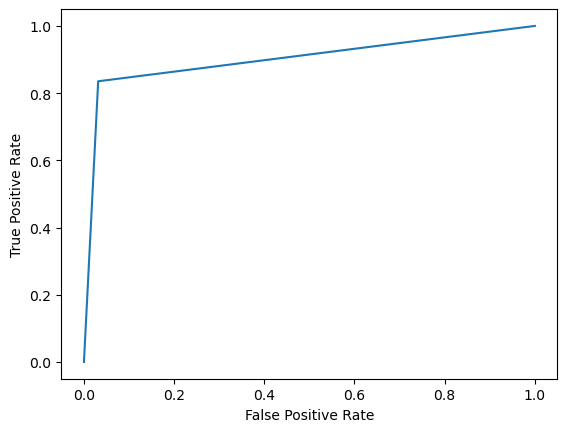

In [36]:
print('\nROC curve for Training data: \n')
fpr, tpr, _ = roc_curve(y_train, train_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


ROC curve for Test data: 



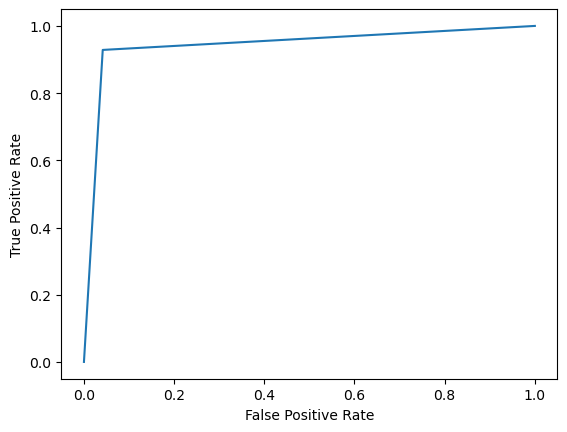

In [37]:
print('\nROC curve for Test data: \n')
fpr, tpr, _ = roc_curve(y_test, test_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [38]:
print('\nTraining Confusion Matrix\n')
confusion_matrix(y_train, train_pred)


Training Confusion Matrix



array([[276,   9],
       [ 28, 142]])

In [39]:
print('\nTest Confusion Matrix\n')
confusion_matrix(y_test, test_pred)


Test Confusion Matrix



array([[69,  3],
       [ 3, 39]])

#### (iv) Spectral Clustering

In [40]:
train_accuracy=0
test_accuracy=0
train_f1_score=0
test_f1_score=0
train_precision_score=0
test_precision_score=0
train_recall_score=0
test_recall_score=0
train_roc_auc_score=0
test_roc_auc_score=0

In [41]:
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 2:], y, test_size=0.2, shuffle=True, stratify=y)

    X_train_norm=MinMaxScaler().fit_transform(X_train)
    X_test_norm=MinMaxScaler().fit_transform(X_test)

    y_train=pd.DataFrame(y_train)

    scluster=SpectralClustering(n_clusters=2, affinity='rbf', random_state=random.randint(0,100)).fit(X_train_norm)

    train_pred = scluster.fit_predict(X_train_norm)
    test_pred = scluster.fit_predict(X_test_norm)
    train_accuracy=train_accuracy+accuracy_score(train_pred, y_train)
    test_accuracy=test_accuracy+accuracy_score(test_pred, y_test)
    train_precision_score=train_precision_score+precision_score(y_train, train_pred, average=None)
    test_precision_score=test_precision_score+precision_score(y_test, test_pred, average=None)
    train_recall_score=train_recall_score+recall_score(y_train, train_pred, average=None)
    test_recall_score=test_recall_score+recall_score(y_test, test_pred, average=None)
    train_f1_score=train_f1_score+f1_score(y_train, train_pred, average=None)
    test_f1_score=test_f1_score+f1_score(y_test, test_pred, average=None)
    fpr, tpr, _ = roc_curve(y_train, train_pred)
    train_roc_auc_score=train_roc_auc_score+auc(fpr, tpr)
    fpr, tpr, _ = roc_curve(y_test, test_pred)
    test_roc_auc_score=test_roc_auc_score+auc(fpr, tpr)
    print("iteration: ", i)

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25
iteration:  26
iteration:  27
iteration:  28
iteration:  29


In [42]:
print('Average Training Accuracy: ',train_accuracy/(i+1))
print('Average Test Acuracy: ',test_accuracy/(i+1))

Average Training Accuracy:  0.6432967032967035
Average Test Acuracy:  0.7307017543859649


In [43]:
train_spec = train_accuracy/(i+1)
test_spec = test_accuracy/(i+1)

print('Average Training Accuracy: ',train_spec)
print('Average Test Acuracy: ',test_spec)

print('Average Training Precision-Score: ',train_precision_score/(i+1))
print('Average Test Precision-Score: ',test_precision_score/(i+1))

print('Average Training Recall-Score: ',train_recall_score/(i+1))
print('Average Test Recall-Score: ',test_recall_score/(i+1))

print('Average Training F1-Score: ',train_f1_score/(i+1))
print('Average Test F1-Score: ',test_f1_score/(i+1))

print('Average Training AUC: ',train_roc_auc_score/(i+1))
print('Average Test AUC: ',test_roc_auc_score/(i+1))

Average Training Accuracy:  0.6432967032967035
Average Test Acuracy:  0.7307017543859649
Average Training Precision-Score:  [0.58081365 0.73874754]
Average Test Precision-Score:  [0.68725765 0.87300669]
Average Training Recall-Score:  [0.69660819 0.55392157]
Average Test Recall-Score:  [0.86157407 0.50634921]
Average Training F1-Score:  [0.63204812 0.61000731]
Average Test F1-Score:  [0.7622319  0.60317785]
Average Training AUC:  0.625264877880977
Average Test AUC:  0.6839616402116403



ROC curve for Training data: 



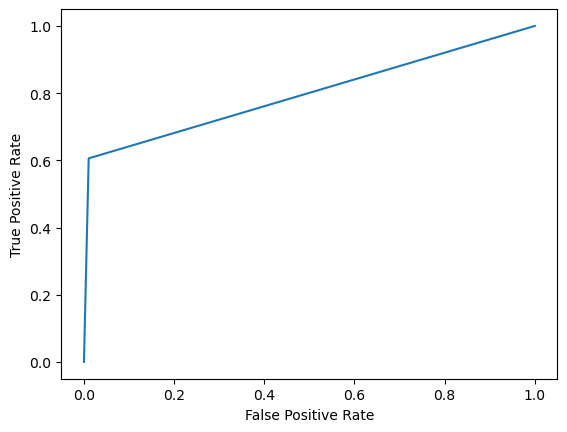

In [44]:
print('\nROC curve for Training data: \n')
fpr, tpr, _ = roc_curve(y_train, train_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


ROC curve for Test data: 



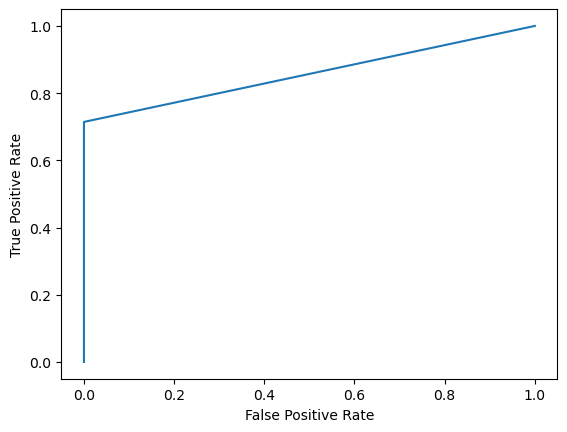

In [45]:
print('\nROC curve for Test data: \n')
fpr, tpr, _ = roc_curve(y_test, test_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [46]:
print('\nTraining Confusion Matrix\n')
confusion_matrix(y_train, train_pred)


Training Confusion Matrix



array([[282,   3],
       [ 67, 103]])

In [47]:
print('\nTest Confusion Matrix\n')
confusion_matrix(y_test, test_pred)


Test Confusion Matrix



array([[72,  0],
       [12, 30]])

#### (v) Compare

In [48]:
print("COMPARISON OF RESULTS:")
print("\n")
print("Supervised Learning : LinearSVC")
print("Average Training Accuracy:", train_sup_learn)
print("Average Test Acuracy:", test_sup_learn)
print("\n")

print("Semi-Supervised Learning/ Self-training : LinearSVC")
print("Training Accuracy:", train_semi_sup)  
print("Average Test Acuracy:",test_semi_sup)
print("\n")

print("Unsupervised Learning : KMeans")
print("Average Training Accuracy:",train_unsup_learn) 
print("Average Test Acuracy:",test_unsup_learn) 
print("\n")

print("Spectral Clustering : SpectralClustering")
print("Average Training Accuracy:",train_spec)
print("Average Test Acuracy:",test_spec)

COMPARISON OF RESULTS:


Supervised Learning : LinearSVC
Average Training Accuracy: 0.9869309838472838
Average Test Acuracy: 0.9089855072463771


Semi-Supervised Learning/ Self-training : LinearSVC
Training Accuracy: 0.9822320117474302
Average Test Acuracy: 0.62


Unsupervised Learning : KMeans
Average Training Accuracy: 0.9260073260073262
Average Test Acuracy: 0.4988304093567251


Spectral Clustering : SpectralClustering
Average Training Accuracy: 0.6432967032967035
Average Test Acuracy: 0.7307017543859649


We can observe that the training accuracy decreases in the order of Supervised -> Semi-Supervised -> Unsupervised learning.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [49]:
data=pd.read_csv('../data/data_banknote_authentication.txt', header=None)

In [50]:
data

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,0:4], data.iloc[:,4:], test_size=0.344)

In [52]:
X_test

,0,1,2,3
985,0.75108,1.9161,-3.10980,-0.20518
61,0.49665,5.5270,1.77850,-0.47156
626,1.83840,6.0630,0.54723,0.51248
417,1.15180,1.3864,5.27270,-0.43536
65,2.53670,2.5990,2.09380,0.20085
...,...,...,...,...
387,4.63610,-2.6611,2.83580,1.19910
1103,-5.63700,8.1261,0.13081,-5.01420
580,4.70720,8.2957,-2.56050,-1.49050
378,2.85230,9.0096,-3.76100,-3.33710


In [53]:
Y_test

,4
985,1
61,0
626,0
417,0
65,0
...,...
387,0
1103,1
580,0
378,0


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [54]:
iteration_error=[]

In [55]:
#passive learning
for i in range(50):
    svc_error=[]
    df1=pd.DataFrame()
    df2=pd.DataFrame()
    X=X_train.copy()
    Y=Y_train.copy()
    for j in range(89):
        X_sample, X_test_sample, Y_train_sample, Y_test_sample = train_test_split(X, Y, train_size=10/len(X), stratify = Y)
        df1 = pd.concat([df1, X_sample], ignore_index=True)
        df2 = pd.concat([df2, Y_train_sample], ignore_index=True)
        X.drop(list(X_sample.index), inplace = True)
        Y.drop(list(X_sample.index), inplace = True)

        #training the Linear SVM on the selected data
        param_grid_SVM={
        'C':np.logspace(-3,6,10),
        }
        gridSVM_L1 = GridSearchCV(estimator=LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=100000), param_grid=param_grid_SVM, cv=5)
        gridSVM_L1.fit(df1, df2)
        svc_error.append(1-gridSVM_L1.score(X_test, Y_test.values.ravel()))
    gridSVM_L1.fit(X_train, Y_train)
    svc_error.append(1-gridSVM_L1.score(X_test, Y_test.values.ravel()))
    iteration_error.append(svc_error)
    print("iteration:", i)

        

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49


In [56]:
passive_learning_error = pd.DataFrame(iteration_error)

In [57]:
passive_learning_error

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.036017,0.042373,0.052966,0.052966,0.076271,0.023305,0.012712,0.012712,0.012712,0.004237,...,0.008475,0.008475,0.010593,0.008475,0.008475,0.008475,0.010593,0.008475,0.008475,0.008475
1,0.135593,0.118644,0.069915,0.063559,0.048729,0.016949,0.010593,0.014831,0.016949,0.014831,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.010593,0.010593,0.008475,0.008475,0.008475
2,0.228814,0.061441,0.076271,0.072034,0.012712,0.031780,0.021186,0.012712,0.014831,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.010593,0.010593,0.008475
3,0.036017,0.025424,0.023305,0.008475,0.012712,0.008475,0.019068,0.025424,0.025424,0.012712,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.008475
4,0.131356,0.055085,0.067797,0.052966,0.012712,0.016949,0.010593,0.010593,0.010593,0.010593,...,0.010593,0.010593,0.010593,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
5,0.199153,0.097458,0.167373,0.152542,0.023305,0.025424,0.023305,0.021186,0.021186,0.021186,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.008475,0.008475
6,0.262712,0.150424,0.019068,0.012712,0.012712,0.012712,0.025424,0.023305,0.019068,0.019068,...,0.010593,0.008475,0.008475,0.008475,0.008475,0.010593,0.008475,0.010593,0.008475,0.008475
7,0.072034,0.019068,0.010593,0.014831,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,...,0.010593,0.010593,0.010593,0.008475,0.008475,0.008475,0.010593,0.010593,0.010593,0.008475
8,0.093220,0.072034,0.063559,0.065678,0.065678,0.031780,0.023305,0.023305,0.014831,0.014831,...,0.010593,0.008475,0.008475,0.008475,0.010593,0.010593,0.010593,0.010593,0.010593,0.008475
9,0.146186,0.086864,0.031780,0.010593,0.008475,0.008475,0.014831,0.012712,0.014831,0.010593,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.008475


In [58]:
average_error_passive = pd.DataFrame(passive_learning_error.mean())

In [59]:
average_error_passive.rename(columns={0:"Average Error"}, inplace=True)

In [60]:
average_error_passive

,Average Error
0,0.131992
1,0.077034
2,0.049915
3,0.043008
4,0.025720
...,...
85,0.009746
86,0.009746
87,0.009788
88,0.009492


#### (ii) Active

In [61]:
for i in range(1):
    #taking the input data
    data = pd.read_csv('../data/data_banknote_authentication.txt', header = None)
    X=data.iloc[:,0:4]
    Y=data.iloc[:,4:]

    #using stratified shuffled split
    s_split=StratifiedShuffleSplit(n_splits=5, test_size=472,random_state=0)
    for train_index, test_index in s_split.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.loc[train_index], Y.loc[test_index]
    
    X_train=X_train.reset_index(drop=True)
    X_test=X_test.reset_index(drop=True)
    y_train=y_train.reset_index(drop=True)
    y_test=y_test.reset_index(drop=True)
    
    new_train = pd.DataFrame()
    test_errs = []
    full_train_data = pd.concat([X_train,y_train],axis=1)
    
    #taking first 10 training samples
    tr_sample = full_train_data.sample(n=10,replace=False)
         
    new_train = pd.concat([new_train,tr_sample], axis = 0)
   
    full_train_data.drop(index=tr_sample.index.tolist(),inplace=True)
    
    new_train_x= new_train.iloc[:,0:4]
    new_train_y= new_train.iloc[:,4:]

In [62]:
active_iteration_error=[]
final = pd.DataFrame()

for j in range(50):
    svc_error=[]
    data= pd.read_csv('../data/data_banknote_authentication.txt',names=['variance','skewness','kurtosis','entropy','class'])
    entire_test = data.sample(472,random_state=random.randint(0,100))
    test_ind = entire_test.index
    train_data = data.drop(index=test_ind)
    entire_test = entire_test.reset_index(drop=True)
    test_data_x = entire_test.drop('class',axis=1)
    test_data_y = entire_test['class'] 

    str_k = StratifiedKFold(n_splits=90)
    X_train_data= train_data.drop(['class'],axis=1)
    train_data_y = train_data['class']
    train_data_y = train_data_y.reset_index(drop=True)
    X_train_data = X_train_data.reset_index(drop=True)
 
    new_train=pd.DataFrame()
      
    for train_index,test_index in str_k.split(X_train_data,train_data_y):
        sample_x,sample_y=X_train_data.iloc[test_index], train_data_y.iloc[test_index]
        tr_sample_df= pd.concat([sample_x,sample_y],axis=1)
        new_train = pd.concat([new_train,tr_sample_df],axis=0)
        break
        
    for i in range(0,90):
        X_train_data= X_train_data.reset_index(drop=True)
        
        param_grid_SVM={
        'C':[0.01,0.1,1,10],
        }
        gridSVM_L1 = GridSearchCV(estimator=LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=10000), param_grid=param_grid_SVM, cv=5)
        gridSVM_L1.fit(new_train_x,new_train_y)
        
        #finding the closest 10 points to the hyperplane
        closest_data = (gridSVM_L1.decision_function(X_train_data))
        closest_data=np.abs(closest_data)
        distances =  pd.DataFrame(closest_data)
        distances = distances.sort_values(0)
        distances = distances.iloc[0:10,]
        distances_index = distances.index
        
        tr_sample  =  train_data.iloc[distances_index,:]
        X_train_data= X_train_data.drop(index = distances_index)
        
        #adding the new 10 points to the training pool
        new_train = pd.concat([new_train,tr_sample],axis=0)
        new_train.reset_index(drop=True,inplace=True)
        new_train_x = new_train.drop('class',axis=1)
        new_train_y = new_train['class']

        #calculating the test error
        svc_error.append(1-gridSVM_L1.score(test_data_x, test_data_y))
    print("iteration:", j)
    active_iteration_error.append(svc_error)        

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49


In [63]:
active_learning_error = pd.DataFrame(active_iteration_error)

In [64]:
active_learning_error

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.103814,0.148305,0.067797,0.046610,0.012712,0.012712,0.012712,0.019068,0.038136,0.038136,...,0.006356,0.006356,0.006356,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
1,0.004237,0.156780,0.152542,0.076271,0.074153,0.072034,0.040254,0.067797,0.025424,0.016949,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.006356,0.008475,0.008475
2,0.006356,0.266949,0.110169,0.025424,0.025424,0.025424,0.025424,0.012712,0.010593,0.010593,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
3,0.014831,0.125000,0.095339,0.095339,0.048729,0.036017,0.036017,0.021186,0.019068,0.019068,...,0.016949,0.012712,0.016949,0.016949,0.016949,0.016949,0.012712,0.012712,0.012712,0.012712
4,0.008475,0.116525,0.116525,0.105932,0.065678,0.059322,0.046610,0.046610,0.057203,0.023305,...,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.012712
5,0.012712,0.148305,0.125000,0.125000,0.125000,0.014831,0.014831,0.012712,0.010593,0.010593,...,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237
6,0.006356,0.228814,0.165254,0.146186,0.088983,0.097458,0.029661,0.014831,0.010593,0.014831,...,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237
7,0.004237,0.086864,0.061441,0.057203,0.014831,0.014831,0.012712,0.012712,0.010593,0.010593,...,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.008475,0.008475,0.008475,0.008475
8,0.008475,0.158898,0.127119,0.169492,0.095339,0.065678,0.059322,0.023305,0.023305,0.036017,...,0.019068,0.019068,0.019068,0.019068,0.016949,0.019068,0.019068,0.019068,0.019068,0.019068
9,0.004237,0.031780,0.038136,0.046610,0.027542,0.019068,0.019068,0.019068,0.019068,0.019068,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356


### (c) Average the 50 test errors

In [65]:
average_error_active = pd.DataFrame(active_learning_error.mean())

In [66]:
average_error_active.rename(columns={0:"Average Error"}, inplace=True)

In [67]:
average_error_active

,Average Error
0,0.012458
1,0.116398
2,0.056695
3,0.044025
4,0.028814
...,...
85,0.011822
86,0.011525
87,0.011653
88,0.011695


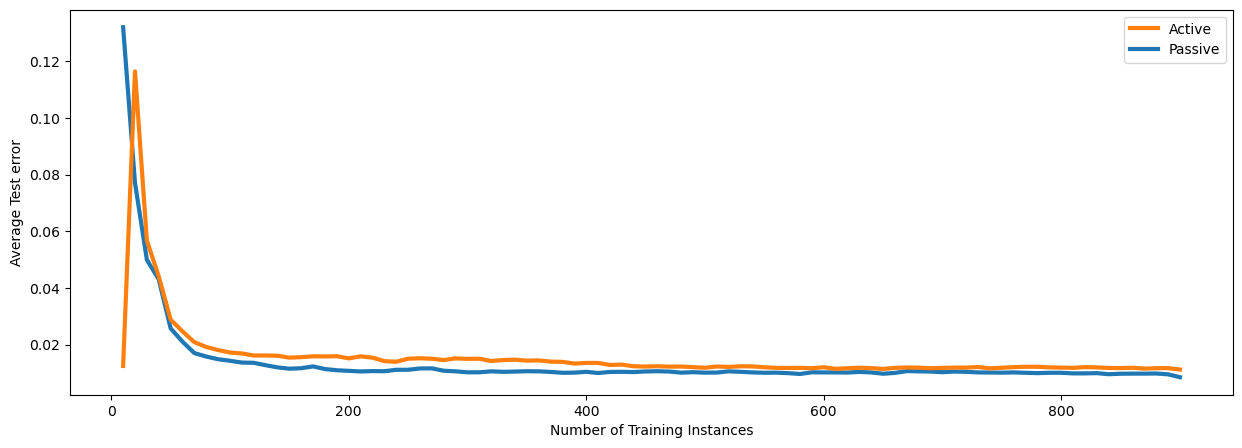

In [68]:
plt.figure(figsize=(15, 5))
number_samples=list(range(10,901,10))
passive, = plt.plot(number_samples, np.array(average_error_passive), label='Passive',linewidth=3)
active, = plt.plot(number_samples, np.array(average_error_active), label='Active',linewidth=3)
plt.legend(handles=[active,passive])
plt.ylabel('Average Test error')
plt.xlabel('Number of Training Instances')
plt.show()

Active Learning reaches the minimum test error faster than passive learning